In [51]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import numpy as np

from solution import *
from helpers import *
from shapely import Polygon
import shapely.plotting as splt
import re

In [46]:
def rgb_str_to_rgba(rgb_str):
    # Extract numeric values from the string using regular expression
    rgb_values = [int(value) for value in re.findall(r'\d+', rgb_str)]
    
    # Convert to RGBA format
    rgba_values = [value / 255 for value in rgb_values] + [1.0]  # Normalize RGB values to the range [0, 1]
    
    return tuple(rgba_values)

In [48]:
def create_colorway(n_colors=20, PLT=False):
    colors = px.colors.sample_colorscale("turbo", [n/(n_colors -1) for n in range(n_colors)])
    if PLT:
        return [rgb_str_to_rgba(r) for r in colors]
    else:
        return colors

colors = create_colorway(10)

In [3]:
# if data is consecutive, just get min and max...

def are_consecutive_np(numbers):
    # Sort the array to ensure consecutive elements are adjacent
    sorted_numbers = np.sort(numbers)
    
    # Check if each element is one greater than the previous one
    consecutive_check = np.all(np.diff(sorted_numbers) == 1)
    return consecutive_check

In [73]:
def get_face(target, face_list:[Face]):
    found_object = next((obj for obj in face_list if obj.name == target), None)
    return found_object

class NodeShape():
    def __init__(self, face_list:[Face], node_name):
        self.label = node_name
        self.min_x = np.min(get_face("faceS", face_list).get_face_sols())
        self.max_x = np.max(get_face("faceN", face_list).get_face_sols())
        self.min_y = np.min(get_face("faceW", face_list).get_face_sols())
        self.max_y = np.max(get_face("faceE", face_list).get_face_sols())
        self.create_shape()

    def create_shape(self):
        self.coords = [
            # col  ==> x, row ==> y 
            (self.min_y, self.min_x),
            (self.max_y, self.min_x),
            (self.max_y, self.max_x),
            (self.min_y, self.max_x),
        ]
        self.shape = Polygon(self.coords)
        self.centroid = (self.shape.centroid.x, self.shape.centroid.y)
        return 
    


In [68]:
def view_plan_shapely(regions:[NodeShape]):
    assert type(regions) != None

    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    colors = create_colorway(len(regions), True)

    for ix, region in enumerate(regions):
        splt.plot_polygon(region.shape, ax=ax, alpha=0.5, color=colors[ix], label=str(region.label))
        ax.annotate(str(region.label), region.centroid)

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    return fig

In [11]:
def format_face_sols(face:Face):
    mid_domain = 25
    sols = face.get_face_sols()
    # ic(face.name, sols)
    if len(sols) == 1:
        return (sols, [mid_domain])
    else: 
        if are_consecutive_np(sols):
            return ([np.min(sols), np.max(sols)], [mid_domain]*2)
        else:
            ic("edge case")

    # return np.array(face.sols), np.repeat(mid_domain, len(face.sols))

def create_node_data(face_list:[Face]):
    node_data = {}
    for face in face_list:
        x, y = format_face_sols(face)

        if face.axis == Axes.X:
            node_data[face.name] = [x, y]
        elif face.axis == Axes.Y:
            node_data[face.name] = [y, x]
        else: 
            pass
    return node_data


In [70]:
def show_solution_step(s:Solution):
    node_viz_data = []

    for ix, node in enumerate(s.graph.nodes):
            node_viz_data.append(create_node_data(s.graph.nodes[ix]["props"].faces.face_list))

    node_names = [str(ix) for ix in s.graph.nodes]
    
    fig = sp.make_subplots(rows=1, cols=len(node_viz_data), subplot_titles=node_names, shared_yaxes=True, shared_xaxes=True,)

    for ix, faces in enumerate(node_viz_data):
        showlegendbool = True if ix == 0 else False
        for iy, (face_name, face_coords) in enumerate(faces.items()):
            fig.add_trace(go.Scatter(x=face_coords[0], y=face_coords[1], name=face_name, marker_color=colors[iy], showlegend=showlegendbool), row=1, col=ix+1)


    fig.show()

    node_shapes = [NodeShape(s.graph.nodes[i]["props"].faces.face_list, i) for i in s.graph.nodes]

    view_plan_shapely(node_shapes)

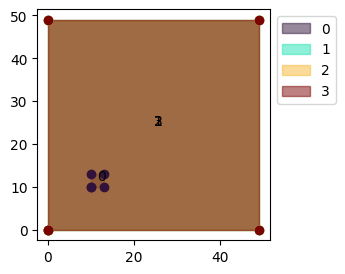

In [74]:
s = Solution()
show_solution_step(s)

In [6]:
s.spanning_tree

[(0, 1), (1, 2), (2, 3), (3, 1), (3, 0), (2, 0)]

ic| solution.py:39 in solve_2D_problem_step()- ix: 0, edge: (0, 1)
ic| solution.py:46 in solve_2D_problem_step()
    f"{edge, orient}": '((0, 1), <Orient.NORTH: 1>)'


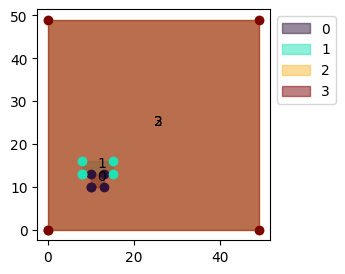

In [75]:
s.step_through_problem()
show_solution_step(s)

ic| solution.py:39 in solve_2D_problem_step()- ix: 1, edge: (1, 2)
ic| solution.py:46 in solve_2D_problem_step()
    f"{edge, orient}": '((1, 2), <Orient.SOUTH: 2>)'


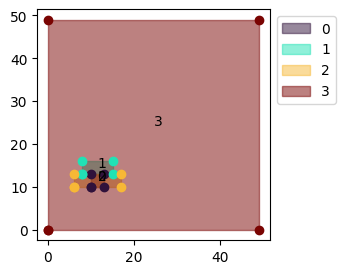

In [76]:
s.step_through_problem()
show_solution_step(s)

ic| solution.py:39 in solve_2D_problem_step()- ix: 2, edge: (2, 3)
ic| solution.py:46 in solve_2D_problem_step()
    f"{edge, orient}": '((2, 3), <Orient.EAST: 3>)'


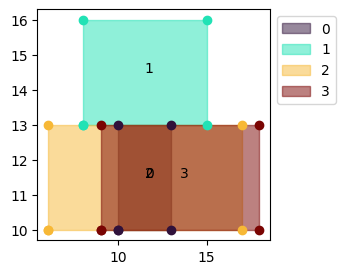

In [77]:
s.step_through_problem()
show_solution_step(s)

ic| solution.py:39 in solve_2D_problem_step()- ix: 3, edge: (3, 1)
ic| solution.py:46 in solve_2D_problem_step()
    f"{edge, orient}": '((3, 1), <Orient.WEST: 4>)'
/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/xie2023/actions.py:75: UserWarning:

Secondary relate failed

ic| solution.py:57 in solve_2D_problem_step()
    "trying spatial relate again": 'trying spatial relate again'
ic| actions.py:47 in secondary_relate()
    "yyy": 'yyy'
    face_i1.sols: [14, 13]
    face_i2.sols: [15, 14]
    set1: [12, 11]
    set2: [14, 13]
    face_j.getSolutions(): [{<Axes.Y: 1>: 13}]


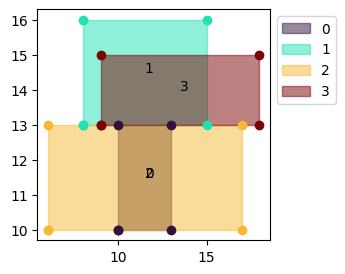

In [78]:
s.step_through_problem()
show_solution_step(s)